In [1]:
from math import sqrt
def _schedule(step : int):
            
    # to account for step = 0
    step += 1
    
    dm = 512
    warmup_steps = 4000
    
    return (1/sqrt(dm)) * min(1/sqrt(step), step * (1/warmup_steps))

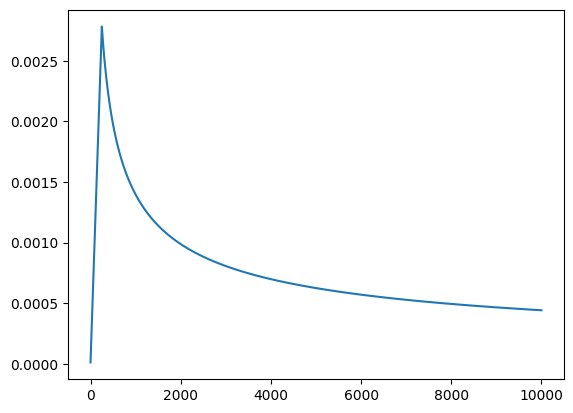

In [3]:
import matplotlib.pyplot as plt

x = [i for i in range(10000)]
y = [_schedule(i) for i in x]

plt.plot(x,y)

In [3]:
from modules.positional_encoding import SinCosPositionalEmbedding

embed = SinCosPositionalEmbedding(model_dimension=512, max_sequence_length=100)

In [8]:
import torch.nn as nn
import torch
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [11]:
pe = PositionalEncoding(d_model=512, max_seq_length=100)

In [26]:
luke_v = embed.pos_embedings.T.unsqueeze(0)

In [27]:
other_v = pe.pe

In [31]:
luke_v[0][0].shape

torch.Size([512])

In [32]:
other_v[0][0].shape

torch.Size([512])

In [35]:
luke_v[0][1]

tensor([8.4147e-01, 5.6969e-01, 8.0196e-01, 6.2342e-01, 7.6172e-01, 6.7091e-01,
        7.2141e-01, 7.1276e-01, 6.8156e-01, 7.4956e-01, 6.4256e-01, 7.8185e-01,
        6.0469e-01, 8.1012e-01, 5.6818e-01, 8.3485e-01, 5.3317e-01, 8.5644e-01,
        4.9974e-01, 8.7527e-01, 4.6795e-01, 8.9168e-01, 4.3781e-01, 9.0596e-01,
        4.0931e-01, 9.1839e-01, 3.8242e-01, 9.2920e-01, 3.5711e-01, 9.3859e-01,
        3.3332e-01, 9.4675e-01, 3.1098e-01, 9.5383e-01, 2.9004e-01, 9.5998e-01,
        2.7043e-01, 9.6531e-01, 2.5208e-01, 9.6994e-01, 2.3492e-01, 9.7395e-01,
        2.1889e-01, 9.7743e-01, 2.0391e-01, 9.8044e-01, 1.8993e-01, 9.8306e-01,
        1.7689e-01, 9.8532e-01, 1.6473e-01, 9.8729e-01, 1.5338e-01, 9.8899e-01,
        1.4281e-01, 9.9046e-01, 1.3296e-01, 9.9174e-01, 1.2378e-01, 9.9284e-01,
        1.1522e-01, 9.9380e-01, 1.0725e-01, 9.9463e-01, 9.9833e-02, 9.9535e-01,
        9.2923e-02, 9.9597e-01, 8.6488e-02, 9.9651e-01, 8.0497e-02, 9.9698e-01,
        7.4919e-02, 9.9738e-01, 6.9726e-

In [36]:
other_v[0][1]

tensor([8.4147e-01, 5.4030e-01, 8.2186e-01, 5.6970e-01, 8.0196e-01, 5.9738e-01,
        7.8189e-01, 6.2342e-01, 7.6172e-01, 6.4791e-01, 7.4154e-01, 6.7091e-01,
        7.2141e-01, 6.9250e-01, 7.0140e-01, 7.1276e-01, 6.8156e-01, 7.3176e-01,
        6.6193e-01, 7.4956e-01, 6.4256e-01, 7.6624e-01, 6.2347e-01, 7.8185e-01,
        6.0469e-01, 7.9646e-01, 5.8626e-01, 8.1012e-01, 5.6818e-01, 8.2290e-01,
        5.5048e-01, 8.3485e-01, 5.3317e-01, 8.4601e-01, 5.1625e-01, 8.5644e-01,
        4.9974e-01, 8.6618e-01, 4.8364e-01, 8.7527e-01, 4.6795e-01, 8.8376e-01,
        4.5267e-01, 8.9168e-01, 4.3781e-01, 8.9907e-01, 4.2335e-01, 9.0596e-01,
        4.0931e-01, 9.1240e-01, 3.9567e-01, 9.1839e-01, 3.8242e-01, 9.2399e-01,
        3.6957e-01, 9.2920e-01, 3.5711e-01, 9.3406e-01, 3.4503e-01, 9.3859e-01,
        3.3332e-01, 9.4281e-01, 3.2197e-01, 9.4675e-01, 3.1098e-01, 9.5042e-01,
        3.0034e-01, 9.5383e-01, 2.9004e-01, 9.5701e-01, 2.8008e-01, 9.5998e-01,
        2.7043e-01, 9.6274e-01, 2.6110e-